**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).**

---


## Recap
So far, you have loaded your data and reviewed it with the following code. Run this cell to set up your coding environment where the previous step left off.

In [1]:
# Code you have previously used to load data
import pandas as pd
import matplotlib.pyplot as plt

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex3 import *

print("Setup Complete")

Setup Complete


# Exercises

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.


In [2]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
y = home_data.SalePrice

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
# step_1.solution()

## Step 2: Create X
Now you will create a DataFrame called `X` holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):
  * LotArea
  * YearBuilt
  * 1stFlrSF
  * 2ndFlrSF
  * FullBath
  * BedroomAbvGr
  * TotRmsAbvGrd

After you've created that list of features, use it to create the DataFrame that you'll use to fit the model.

In [5]:
# Create the list of features below
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [6]:
# step_2.hint()
# step_2.solution()

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [7]:
# Review data
# print description or statistics from X
display(X)

# print the top few lines
display(X.head())

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1455,7917,1999,953,694,2,3,7
1456,13175,1978,2073,0,2,3,7
1457,9042,1941,1188,1152,2,4,9
1458,9717,1950,1078,0,1,2,5


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it `iowa_model`. Ensure you've done the relevant import from sklearn to run this command.

Then fit the model you just created using the data in `X` and `y` that you saved above.

In [8]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1, max_depth=10)

# Fit the model
iowa_model.fit(X, y)

print(iowa_model.score(X, y))

# Check your answer
step_3.check()

0.9690546018842326


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

## Inspect the fitted model

In [9]:
import pprint
print(f"Tree depth: {iowa_model.get_depth()}")
print(f"Number of leaves: {iowa_model.get_n_leaves()}")
print(f"Model score for the training data: {iowa_model.score(X, y)}")
print(f"Model parameters:\n{iowa_model.get_params()}")

Tree depth: 10
Number of leaves: 399
Model score for the training data: 0.9690546018842326
Model parameters:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [10]:
# step_3.hint()
# step_3.solution()

## Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [11]:
predictions = iowa_model.predict(X)
print(predictions)

# Check your answer
step_4.check()

[216550.         161754.16666667 216550.         ... 266500.
 133442.64705882 151802.56410256]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
# step_4.hint()
# step_4.solution()

## Think About Your Results

Use the `head` method to compare the top few predictions to the actual home values (in `y`) for those same homes. Anything surprising?


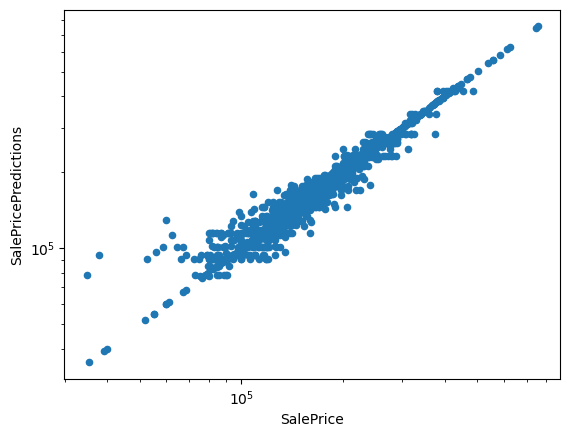

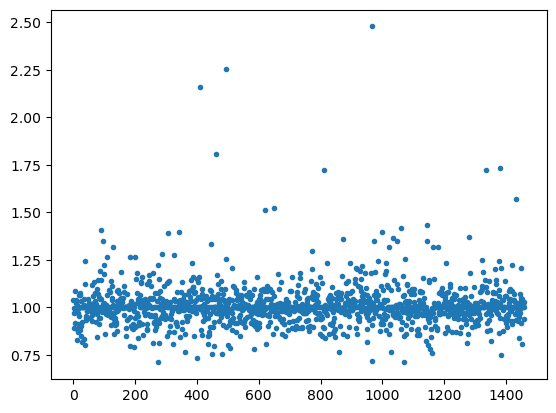

In [13]:
# You can write code in this cell
home_data['SalePricePredictions'] = predictions

ax = home_data.plot.scatter(x='SalePrice', y='SalePricePredictions')
ax.set_xscale('log')
ax.set_yscale('log')

plt.figure()
plt.plot(home_data.SalePricePredictions/home_data.SalePrice, '.')

## Visualize the decision tree

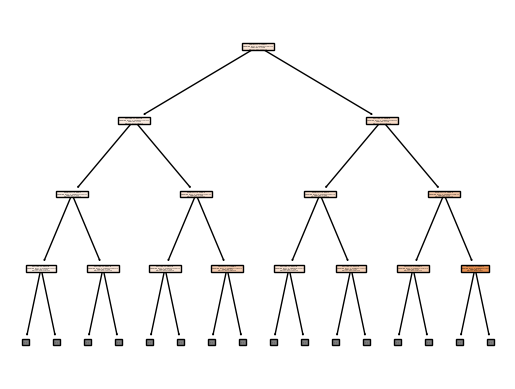

In [14]:
from sklearn import tree

_ = tree.plot_tree(iowa_model, max_depth=3, feature_names=feature_names, filled=True)

It's natural to ask how accurate the model's predictions will be and how you can improve that. That will be you're next step.

# Keep Going

You are ready for **[Model Validation](https://www.kaggle.com/dansbecker/model-validation).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*